# Group 6:
Brian Lie Wei Siong U2221210A
Robin Yong U2223091K
Max Chang

## PROBLEM 
To help consumers predict the price of a diamond to justify their purchase of said diamond.

## Dataset
Diamond dataset: https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle

``cut`` refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'. <br>

``color`` Clear diamonds are graded D-Z. The higher letters more yellowish but are often better values since color is hard to determine once in a ring. <br>

``clarity`` refers the inclusions (i.e., internal flaws) in the diamonds seen though a jewelers loupe or microscope. Fewer and smaller are better. <br>

``carat_weight`` Refers to the mass of the diamond. It's loosely connected with dimension of a diamond but ``cut`` and ``cut_quality`` tends to play an equally large if not larger role. <br>

``cut_quality`` refers the GIA Cut Grading System which was developed in 2005 and is de facto standard. <br>

``lab`` is the grading lab. The big three are GIA, IGI and HRD. Each diamond gets a lab certificate that looks like this.
``polish`` and ``symmetry`` are what you would expect. <br>

``eye-clean`` refers to the blemishes or inclusions can see with a the naked eye. There are 10 grades. <br>

``culet_size`` is the size of the circle you'd see if you looked straight down. None is ideal because it affects the amount of light that gets reflected. <br>

``culet_condition`` indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot. <br>

``fancy_color_`` columns have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab grown. <br>

``fluor`` columns refer to the effect of long wave UV light. According to GIA 25-35% have it; for ~10% of those it's noticeable to an expert. <br>

``depth_percentandtable_percent`` are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut. <br>

``meas_length``, ``meas_width``, ``meas_depth`` are the absolute measurements of stone. <br>

``girdle min/max`` are where the id of a stone is engraved they also are where the meets the setting and play a role in reflection. There are 9 values ranging from extremely thin to extremely thick <br>

``fancy`` columns refer to colored diamonds. They can be natural like the extremely rare blue diamonds, or lab grown. The columns refer to the colors, secondary colors and their intensity. <br>

``total_sales_price`` is priced in dollars.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
sb.set()

# Import data

In [86]:
df = pd.read_csv("diamonds.csv")
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [3]:
def PrintCategoricalValue(df, filter=None):
    if filter==None:
        filter=df.columns
    for col in filter:
        if (df.dtypes[col] == object):
            print(col, end = ": ")
            for value in df[col].unique():
                print(value, end=", ")
            print()
PrintCategoricalValue(df)

cut: Round, Pear, Oval, Marquise, Princess, Emerald, Heart, Cushion, Radiant, Cushion Modified, Asscher, 
color: E, F, L, D, J, I, G, H, M, K, unknown, 
clarity: VVS2, VVS1, I1, VS1, VS2, IF, SI2, I2, SI1, SI3, I3, 
cut_quality: Excellent, Very Good, unknown, Good, Fair, Ideal, 
lab: IGI, GIA, HRD, 
symmetry: Very Good, Excellent, Good, Fair, Poor, 
polish: Very Good, Excellent, Good, Fair, Poor, 
eye_clean: unknown, Yes, E1, Borderline, No, 
culet_size: N, unknown, S, M, VS, L, EL, SL, VL, 
culet_condition: unknown, Abraded, Chipped, Pointed, 
girdle_min: M, STK, TN, TK, unknown, VTN, VTK, XTK, XTN, STN, 
girdle_max: M, STK, TK, unknown, TN, VTK, XTK, XTN, VTN, STN, 
fluor_color: unknown, Blue, Yellow, Green, White, Orange, 
fluor_intensity: None, Very Slight, Strong, Medium, Faint, Very Strong, unknown, Slight, 
fancy_color_dominant_color: unknown, Orange, Brown, Yellow, Pink, Black, Other, Gray, Purple, Blue, Green, Chameleon, Red, 
fancy_color_secondary_color: unknown, Purple, Gree

# Clean up data

In [4]:
df_clean = df.copy()

**Remove Null values** (none exists)

In [5]:
df.isnull().sum()

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

**Removing 'unknown' values**

In [6]:
df_clean = df_clean[(df_clean["color"] != "unknown")]
PrintCategoricalValue(df_clean, filter=["color"])

color: E, F, L, D, J, I, G, H, M, K, 


**Removing Outliers**

In [7]:
def GetOutlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_whisker = q3 + 1.5 * iqr
    lower_whisker = q1 - 1.5 * iqr
    outliers = df[(df[col] > upper_whisker) | (df[col] < lower_whisker)]
    return outliers

outliers = [
    GetOutlier(df_clean,"total_sales_price"),
#     GetOutlier(df_clean,"meas_width")
]
outliers = pd.concat(outliers).drop_duplicates()
df_clean = df_clean.drop(outliers.index)

**Replace categorical values with numbers**

In [8]:
df_clean["color_n"] = df_clean["color"]
PrintCategoricalValue(df_clean, filter=["color_n"])

# color values are alphabets ranging from D to Z, where Z is more yellow but of a higher value
# replacing them with D=0, E=1, ... Z=22
before = [*"DEFGHIJKLMNOPQRSTUVWXYZ"]
after = list(range(len(before)))

df_clean["color_n"].replace(before,after, inplace=True)


color_n: E, F, L, D, J, I, G, H, M, K, 


In [9]:

df_clean["clarity_n"] = df_clean["clarity"]
# PrintCategoricalValue(df_clean, filter=["color_n"])

# no particular order
before = ["VVS2", "VVS1", "I1", "VS1", "VS2", "IF", "SI2", "I2", "SI1", "SI3", "I3"]
after = list(range(len(before)))

df_clean["clarity_n"].replace(before,after, inplace=True)


In [10]:
df_clean["cut_n"] = df_clean["cut"]
# PrintCategoricalValue(df_clean, filter=["color_n"])

# order based on their median values
before = ["Round", "Pear", "Oval", "Marquise", "Princess", "Emerald", "Heart", "Cushion", "Radiant", "Cushion Modified", "Asscher"]
after = list(range(len(before)))

df_clean["cut_n"].replace(before,after, inplace=True)


In [11]:

df_clean["cut_nn"] = df_clean["cut"]
# PrintCategoricalValue(df_clean, filter=["color_n"])

# color values are alphabets ranging from D to Z, replacing them with D=0, E=1, ... Z=22
before = ["Round", "Marquise", "Pear", "Heart", "Emerald", "Oval", "Princess", "Radiant", "Cushion", "Cushion Modified", "Asscher"]
after = list(range(len(before)))

df_clean["cut_nn"].replace(before,after, inplace=True)


In [74]:
df_clean["symmetry_n"] = df_clean["symmetry"]
# PrintCategoricalValue(df_clean, filter=["color_n"])

# color values are alphabets ranging from D to Z, replacing them with D=0, E=1, ... Z=22
before = ["Poor", "Fair", "Excellent", "Good","Very Good"]
after = list(range(len(before)))

df_clean["symmetry_n"].replace(before,after, inplace=True)

# Explore data

**Plot** ``total_salesprice`` **before cleaning**

<AxesSubplot:>

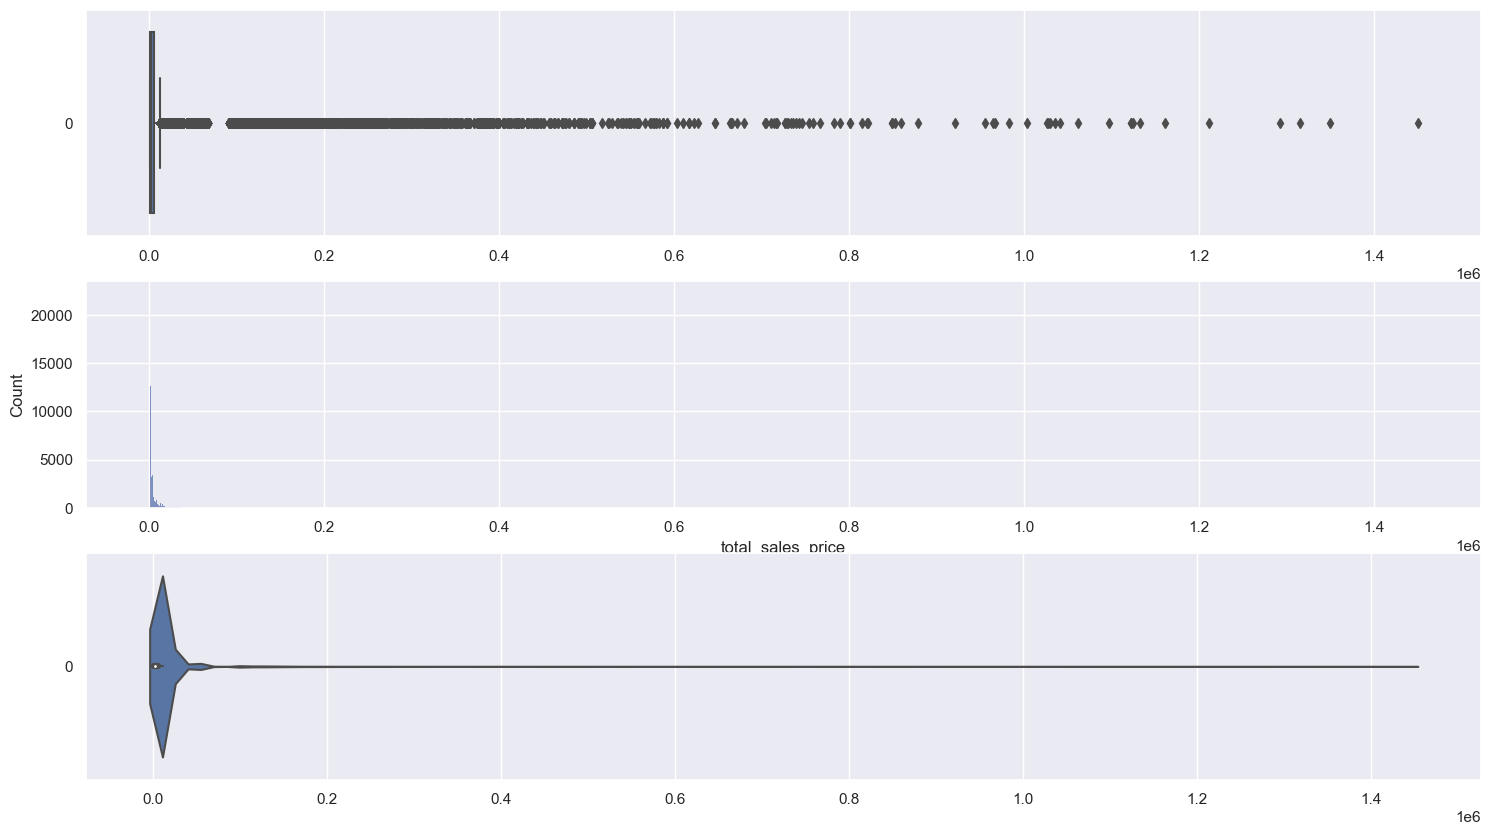

In [13]:
# f, axes = plt.subplots(3, figsize=(18, 10))
# sb.boxplot(data=df["total_sales_price"], orient = "h", ax =axes[0])
# sb.histplot(data=df["total_sales_price"], ax=axes[1])
# sb.violinplot(data=df["total_sales_price"], orient = "h", ax=axes[2])

**Plot** ``total_salesprice`` **after cleaning**

<AxesSubplot:>

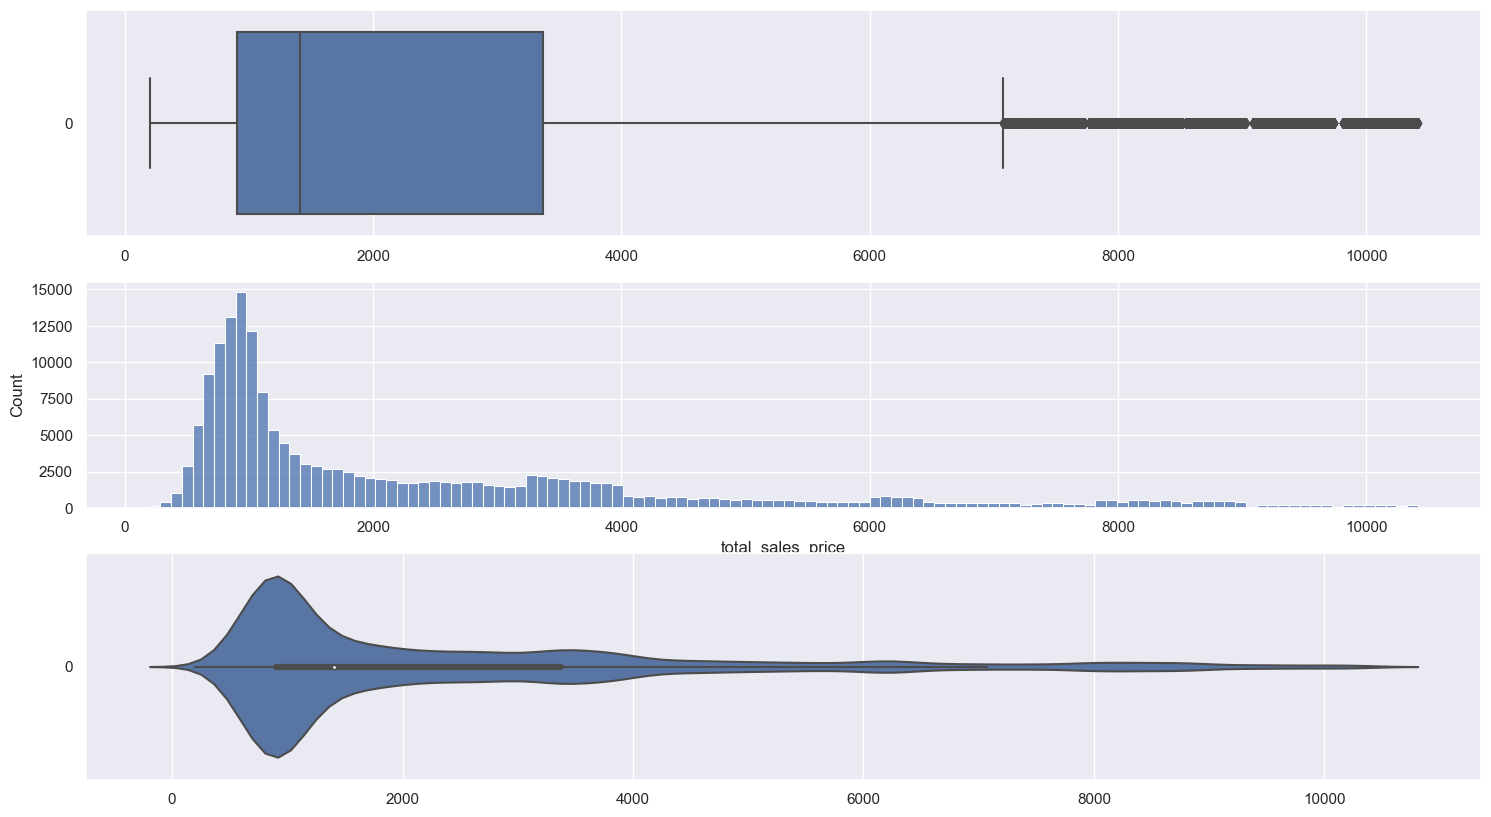

In [14]:
# f, axes = plt.subplots(3, figsize=(18, 10))
# sb.boxplot(data=df_clean["total_sales_price"], orient = "h", ax =axes[0])
# sb.histplot(data=df_clean["total_sales_price"], ax=axes[1])
# sb.violinplot(data=df_clean["total_sales_price"], orient = "h", ax=axes[2])

# Explore correlation between numeric data

**Correlation before cleaning**

<AxesSubplot:>

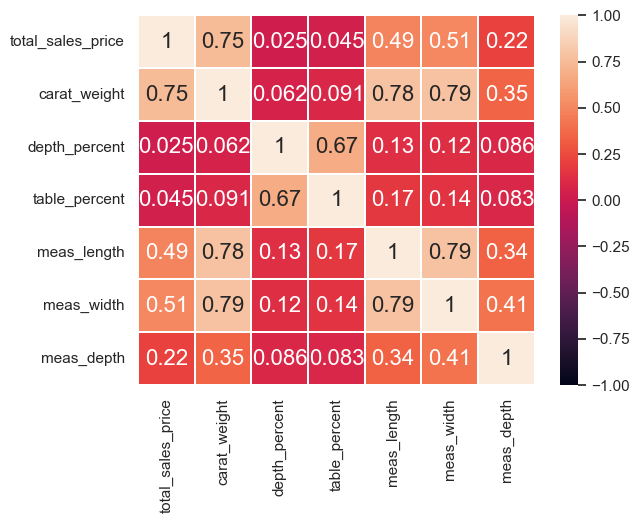

In [15]:
numericData = pd.DataFrame(df[["total_sales_price","carat_weight", "depth_percent", "table_percent", "meas_length", "meas_width", "meas_depth"]])
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1, linewidths = 0.1,
           annot = True, annot_kws = {"size": 16})

**Correlation after cleaning**

<AxesSubplot:>

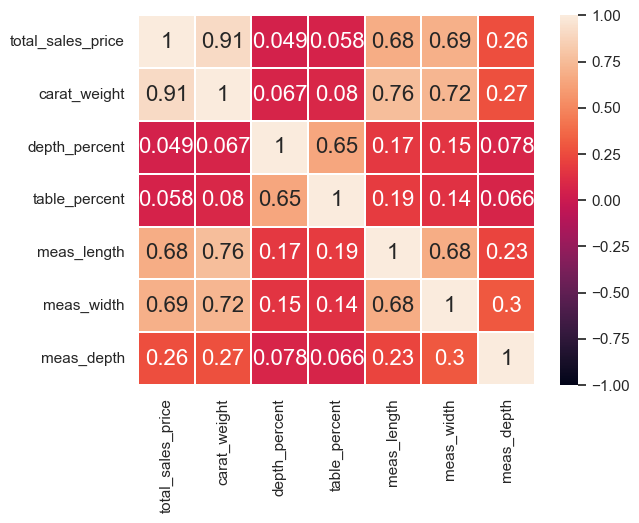

In [16]:
numericData_clean = pd.DataFrame(df_clean[["total_sales_price","carat_weight", "depth_percent", "table_percent", "meas_length", "meas_width", "meas_depth"]])
sb.heatmap(numericData_clean.corr(), vmin = -1, vmax = 1, linewidths = 0.1,
           annot = True, annot_kws = {"size": 16})

<AxesSubplot:>

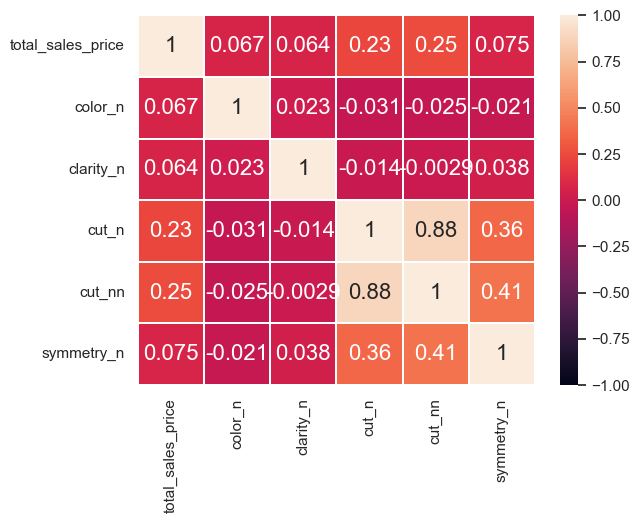

In [75]:
numericData_clean = pd.DataFrame(df_clean[["total_sales_price","color_n","clarity_n","cut_n","cut_nn","symmetry_n"]])
sb.heatmap(numericData_clean.corr(), vmin = -1, vmax = 1, linewidths = 0.1,
           annot = True, annot_kws = {"size": 16})

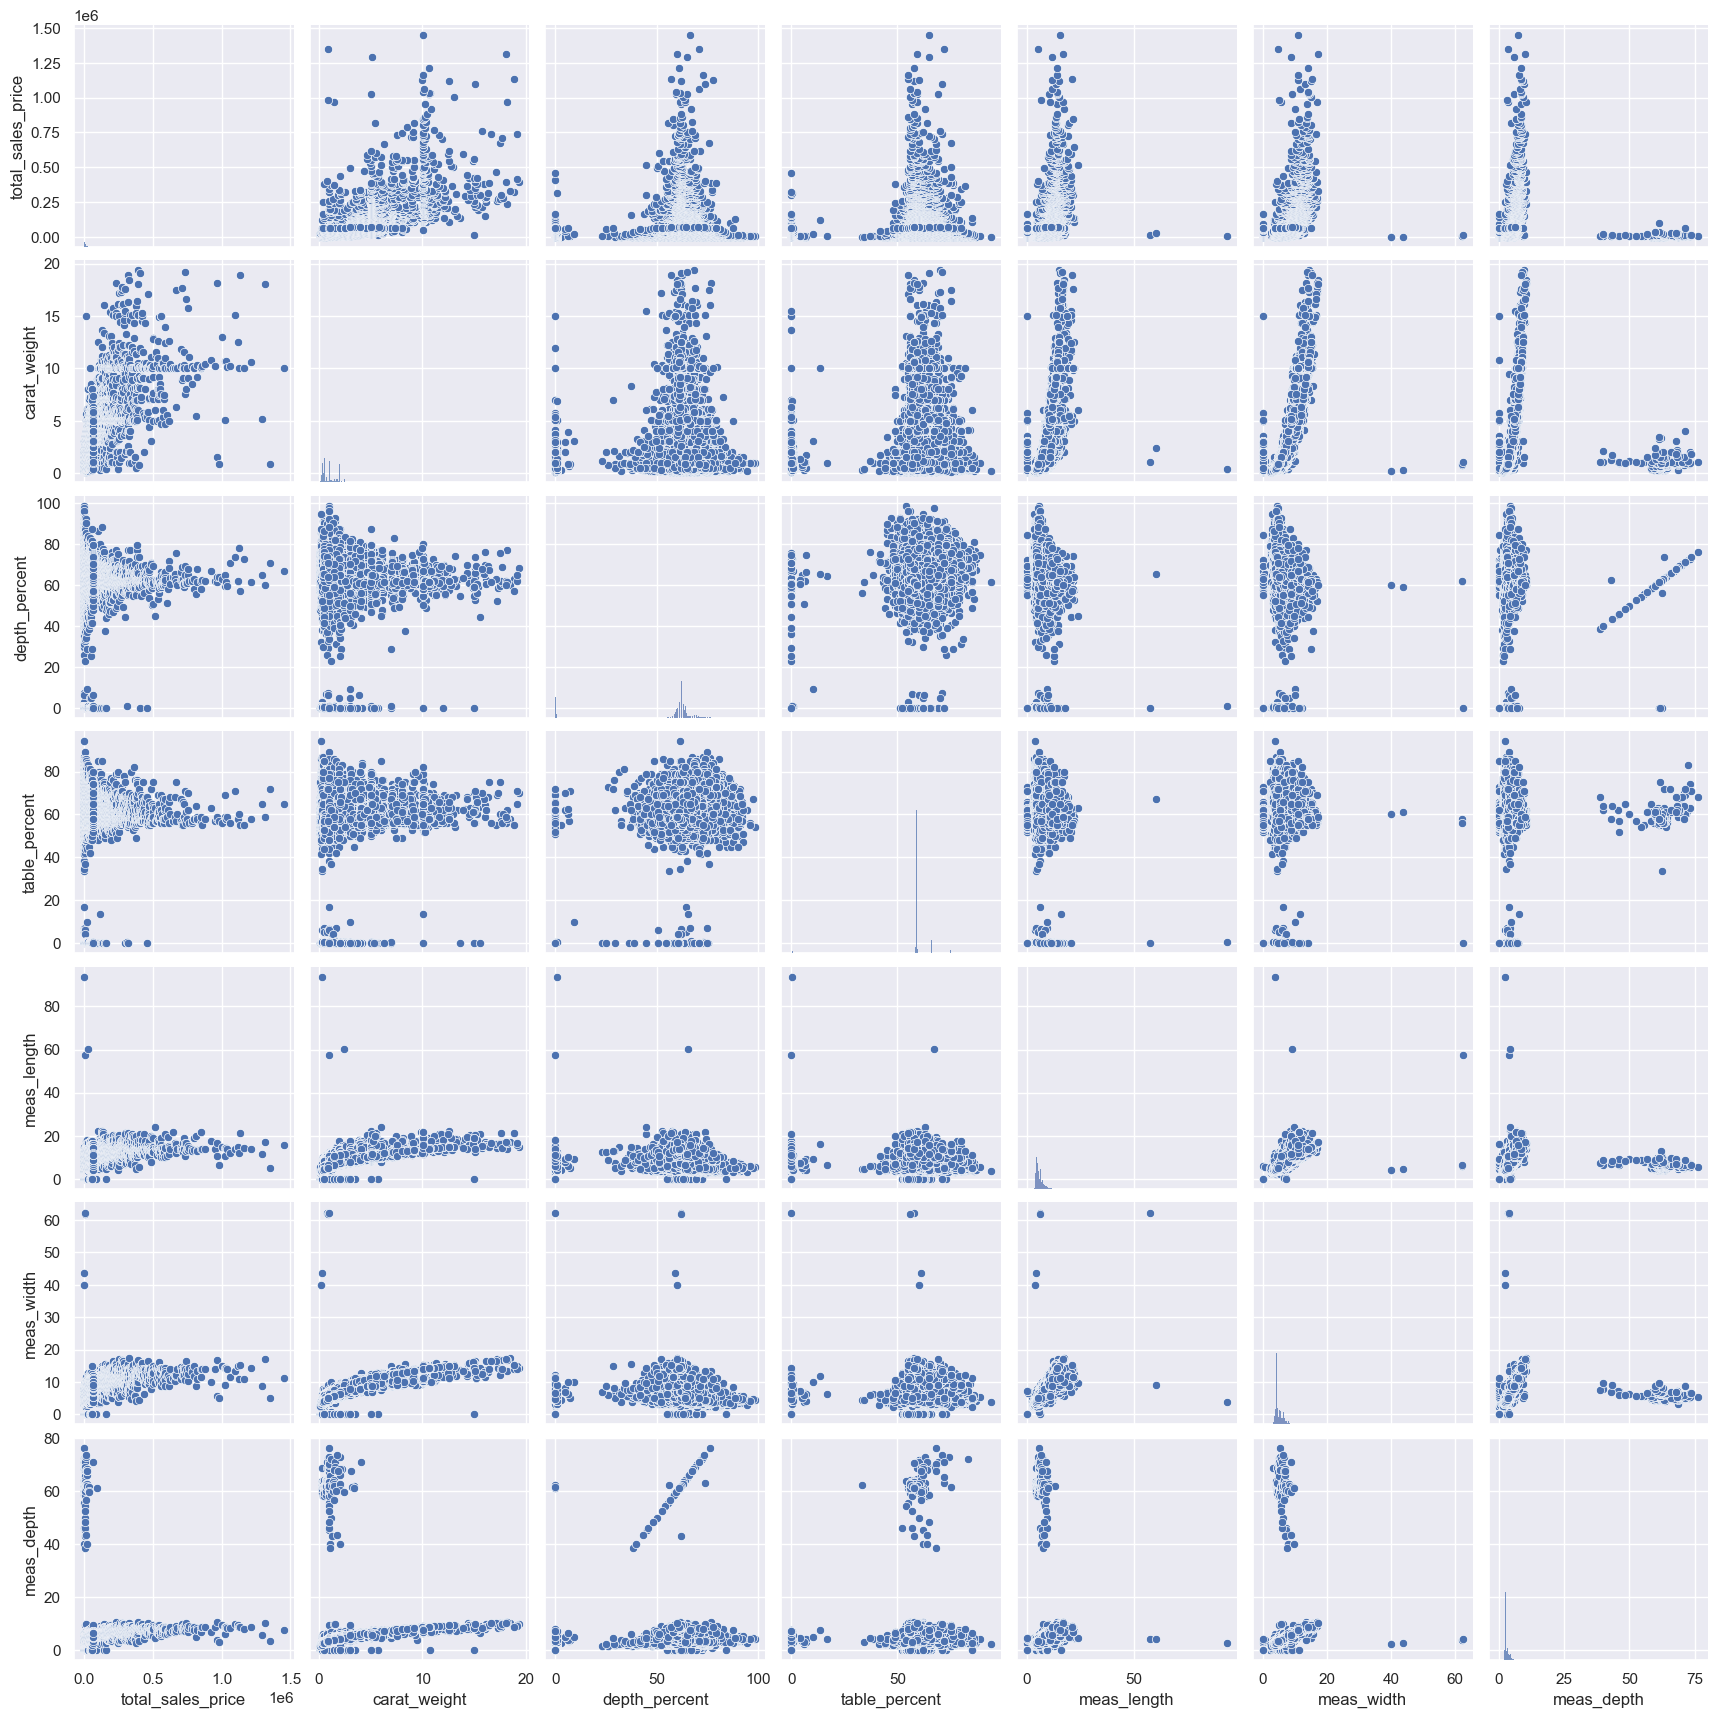

In [76]:
sb.pairplot(data = numericData)

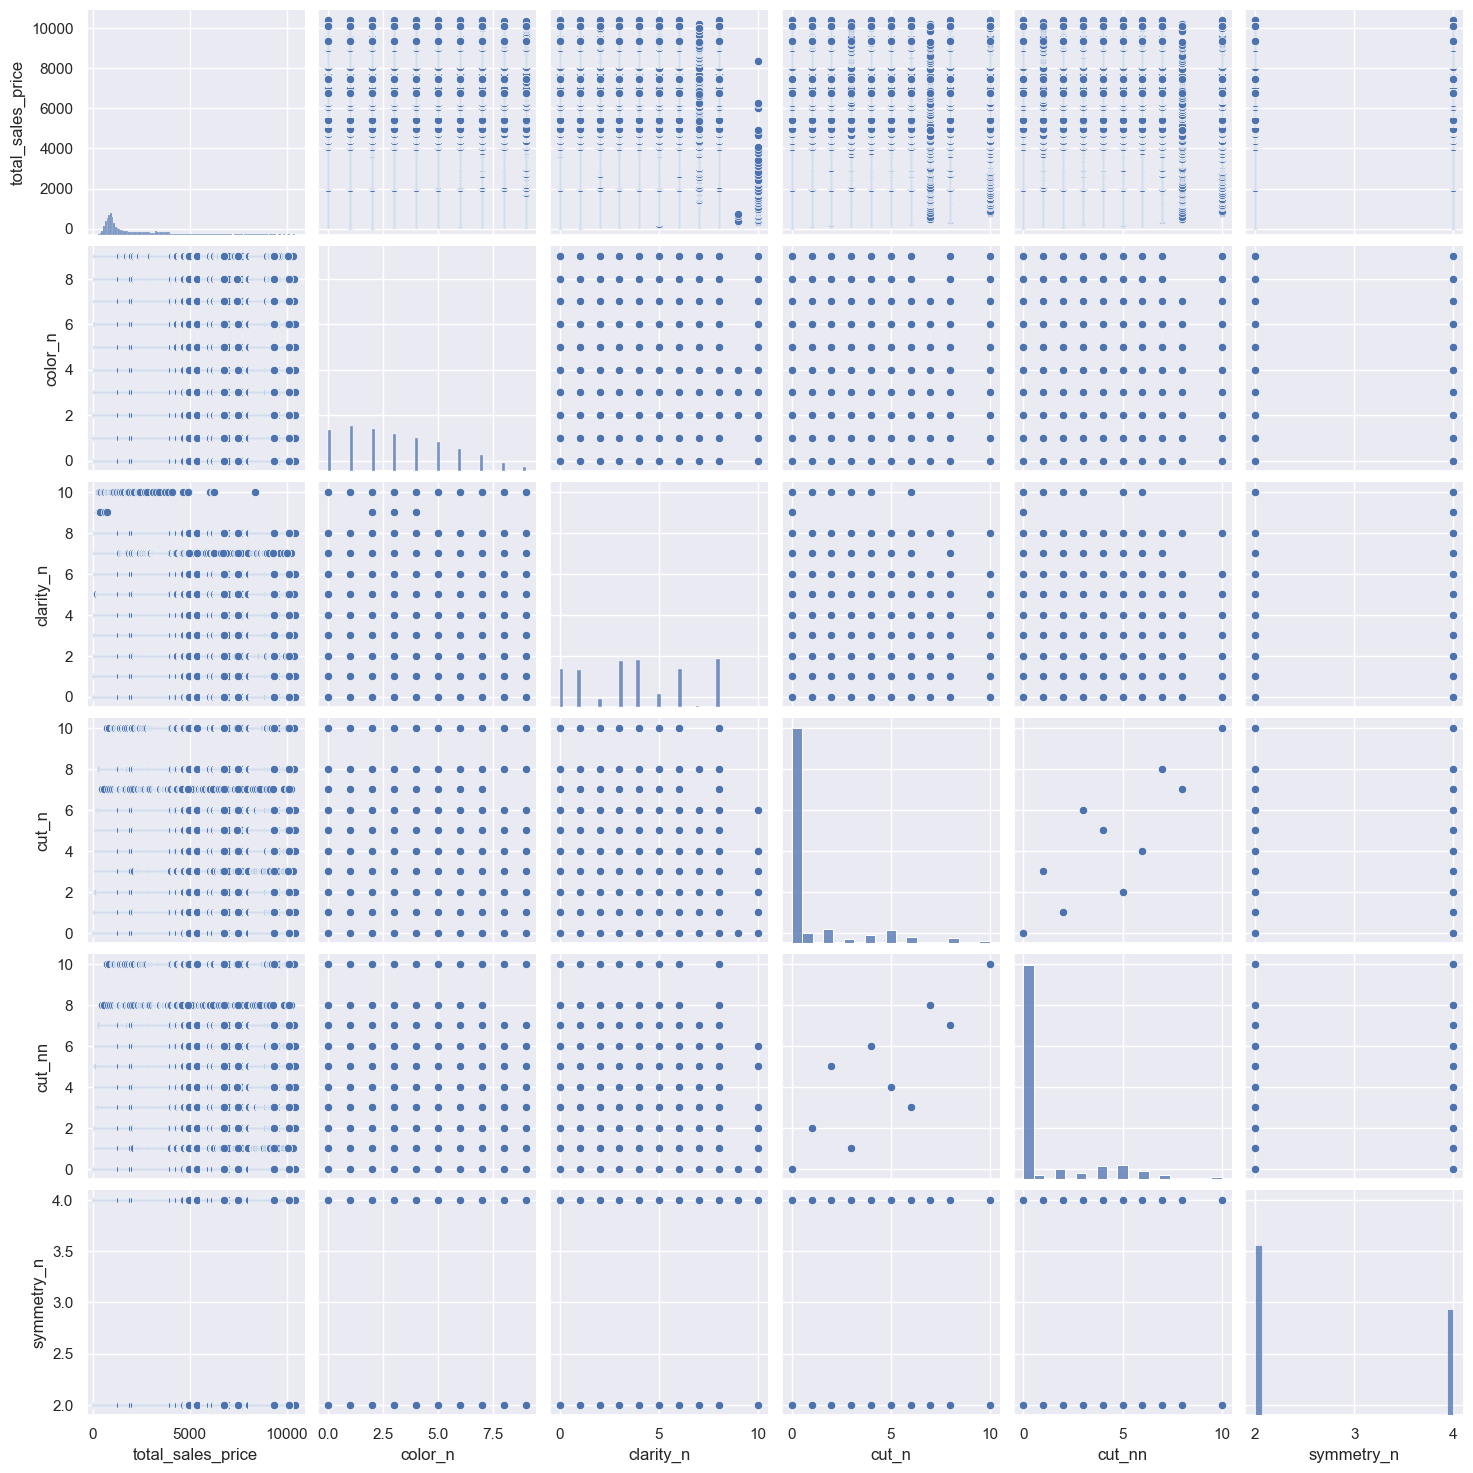

In [77]:
sb.pairplot(data = numericData_clean)

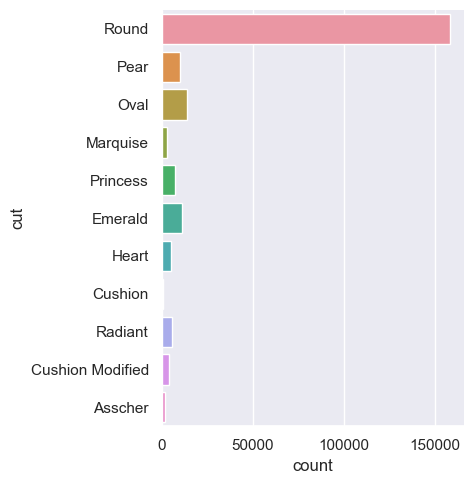

In [78]:
sb.catplot(y="cut", data = df, kind="count")

<AxesSubplot:xlabel='total_sales_price', ylabel='cut'>

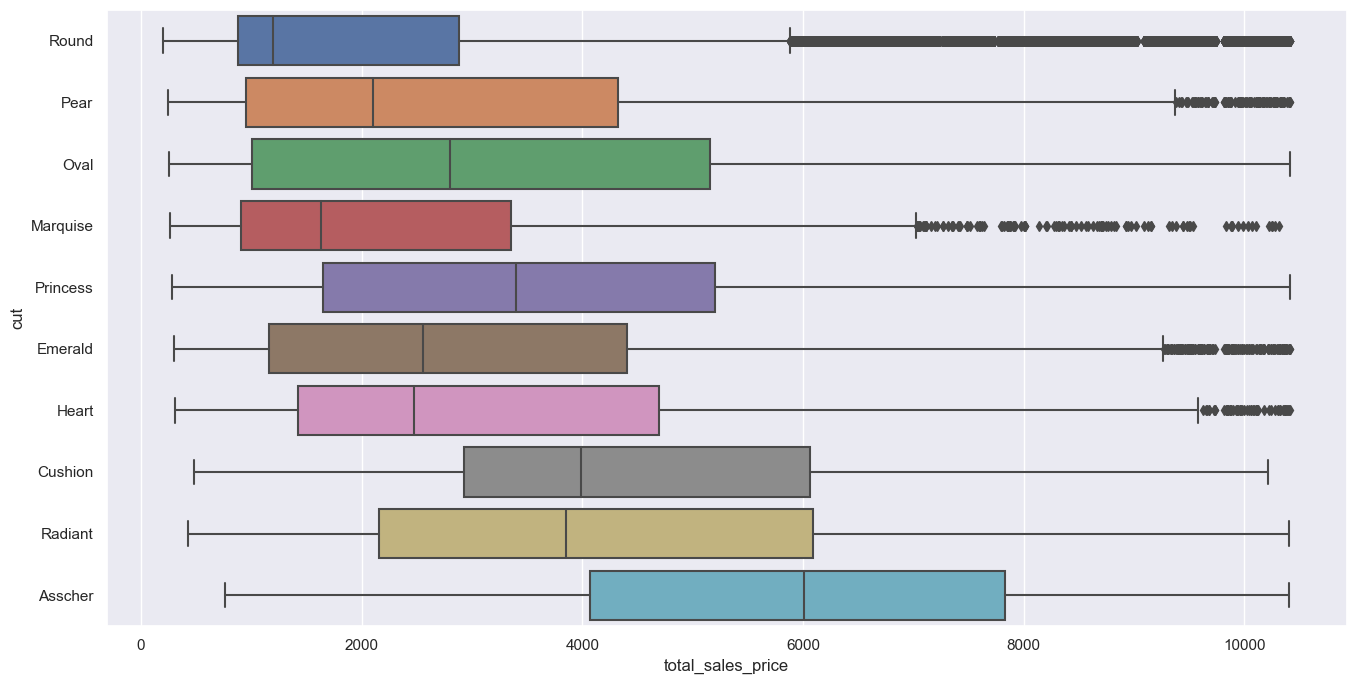

In [21]:
f = plt.figure(figsize=(16,8))
sb.boxplot(x="total_sales_price", y="cut", data=df_clean)

# Linear Regression
Retrieve response and predictors

In [79]:
salePrice = pd.DataFrame(df_clean["total_sales_price"])
predictor = pd.DataFrame(df_clean[["carat_weight","meas_width","cut_nn"]])

Split data into train and test sets

In [80]:
salePrice_train, salePrice_test, predictor_train, predictor_test = train_test_split(salePrice, predictor, test_size=0.2)

print("Train Set:")
print(f"salePrice: {salePrice_train.shape}, predictor: {predictor_train.shape}")
print("Test Set:")
print(f"salePrice: {salePrice_test.shape}, predictor: {predictor_test.shape}")

Train Set:
salePrice: (147269, 1), predictor: (147269, 3)
Test Set:
salePrice: (36818, 1), predictor: (36818, 3)


Train model

In [81]:
linreg = LinearRegression()
linreg.fit(predictor_train, salePrice_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-1527.10577083]
Coefficients 	: a =  [[6811.35300089   98.92775244  -57.0664525 ]]


Test model against training data and test data

In [82]:
salePrice_train_pred = linreg.predict(predictor_train)

mse = np.mean(np.square(np.array(salePrice_train)-np.array(salePrice_train_pred)))
print(f"MSE: {mse}")
print(f"RMSE: {mse ** 0.5}")
print(f"R^2: {linreg.score(predictor_train, salePrice_train)}")

MSE: 823988.5618599466
RMSE: 907.7381571025571
R^2: 0.8341700772106652


In [83]:
salePrice_test_pred = linreg.predict(predictor_test)

mse = np.mean(np.square(np.array(salePrice_test)-np.array(salePrice_test_pred)))
print(f"MSE: {mse}")
print(f"RMSE: {mse ** 0.5}")
print(f"R^2: {linreg.score(predictor_test, salePrice_test)}")

MSE: 823404.8139258985
RMSE: 907.4165603105878
R^2: 0.8344035606404835


In [84]:
predictor_test

pd.data

# libreg.predict()

,carat_weight,meas_width,cut_nn
144811,0.55,5.29,0
133363,0.60,4.05,4
134627,0.50,5.19,0
81128,0.36,4.55,0
43049,0.30,4.27,0
...,...,...,...
57141,0.30,3.75,5
55537,0.33,4.52,0
32118,0.33,3.86,2
165846,0.81,5.95,0


**Duplicate of the code above**

In [73]:
salePrice = pd.DataFrame(df_clean["total_sales_price"])
predictor = pd.DataFrame(df_clean[["carat_weight","meas_width","meas_length","cut_nn","color_n","clarity_n"]])

salePrice_train, salePrice_test, predictor_train, predictor_test = train_test_split(salePrice, predictor, test_size=0.2)

linreg = LinearRegression()
linreg.fit(predictor_train, salePrice_train)
salePrice_train_pred = linreg.predict(predictor_train)

mse = np.mean(np.square(np.array(salePrice_train)-np.array(salePrice_train_pred)))
print(f"MSE: {mse}")
print(f"RMSE: {mse ** 0.5}")
print(f"R^2: {linreg.score(predictor_train, salePrice_train)}")

salePrice_test_pred = linreg.predict(predictor_test)

mse = np.mean(np.square(np.array(salePrice_test)-np.array(salePrice_test_pred)))
print(f"MSE: {mse}")
print(f"RMSE: {mse ** 0.5}")
print(f"R^2: {linreg.score(predictor_test, salePrice_test)}")

MSE: 584030.3405566277
RMSE: 764.2187779403407
R^2: 0.8826122310778919
MSE: 581171.5729019254
RMSE: 762.3460978465919
R^2: 0.8825172425992419


# Decision Tree
Retrieve response and predictors

In [28]:
salePrice = pd.DataFrame(df["total_sales_price"])
predictor = pd.DataFrame(df["lab"])

Split data into train and test sets

In [29]:
salePrice_train, salePrice_test = train_test_split(salePrice, test_size=0.2)
predictor_train, predictor_test = train_test_split(predictor, test_size=0.2)
print("Train Set:")
print(f"salePrice: {salePrice_train.shape}, predictor: {predictor_train.shape}")
print("Test Set:")
print(f"salePrice: {salePrice_test.shape}, predictor: {predictor_test.shape}")

Train Set:
salePrice: (175762, 1), predictor: (175762, 1)
Test Set:
salePrice: (43941, 1), predictor: (43941, 1)


In [30]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(salePrice_train, predictor_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'total_sales_price <= 27719.5\ngini = 0.162\nsamples = 175762\nvalue = [160372, 2725, 12665]'),
 Text(0.25, 0.625, 'total_sales_price <= 12936.0\ngini = 0.161\nsamples = 168761\nvalue = [154052, 2607, 12102]'),
 Text(0.125, 0.375, 'total_sales_price <= 709.0\ngini = 0.162\nsamples = 156876\nvalue = [143111, 2444, 11321]'),
 Text(0.0625, 0.125, 'gini = 0.154\nsamples = 14698\nvalue = [13481, 221, 996]'),
 Text(0.1875, 0.125, 'gini = 0.163\nsamples = 142178\nvalue = [129630, 2223, 10325]'),
 Text(0.375, 0.375, 'total_sales_price <= 14006.0\ngini = 0.148\nsamples = 11885\nvalue = [10941, 163, 781]'),
 Text(0.3125, 0.125, 'gini = 0.112\nsamples = 1460\nvalue = [1374, 14, 72]'),
 Text(0.4375, 0.125, 'gini = 0.153\nsamples = 10425\nvalue = [9567, 149, 709]'),
 Text(0.75, 0.625, 'total_sales_price <= 27723.0\ngini = 0.178\nsamples = 7001\nvalue = [6320, 118, 563]'),
 Text(0.625, 0.375, 'total_sales_price <= 27721.0\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(0.5625

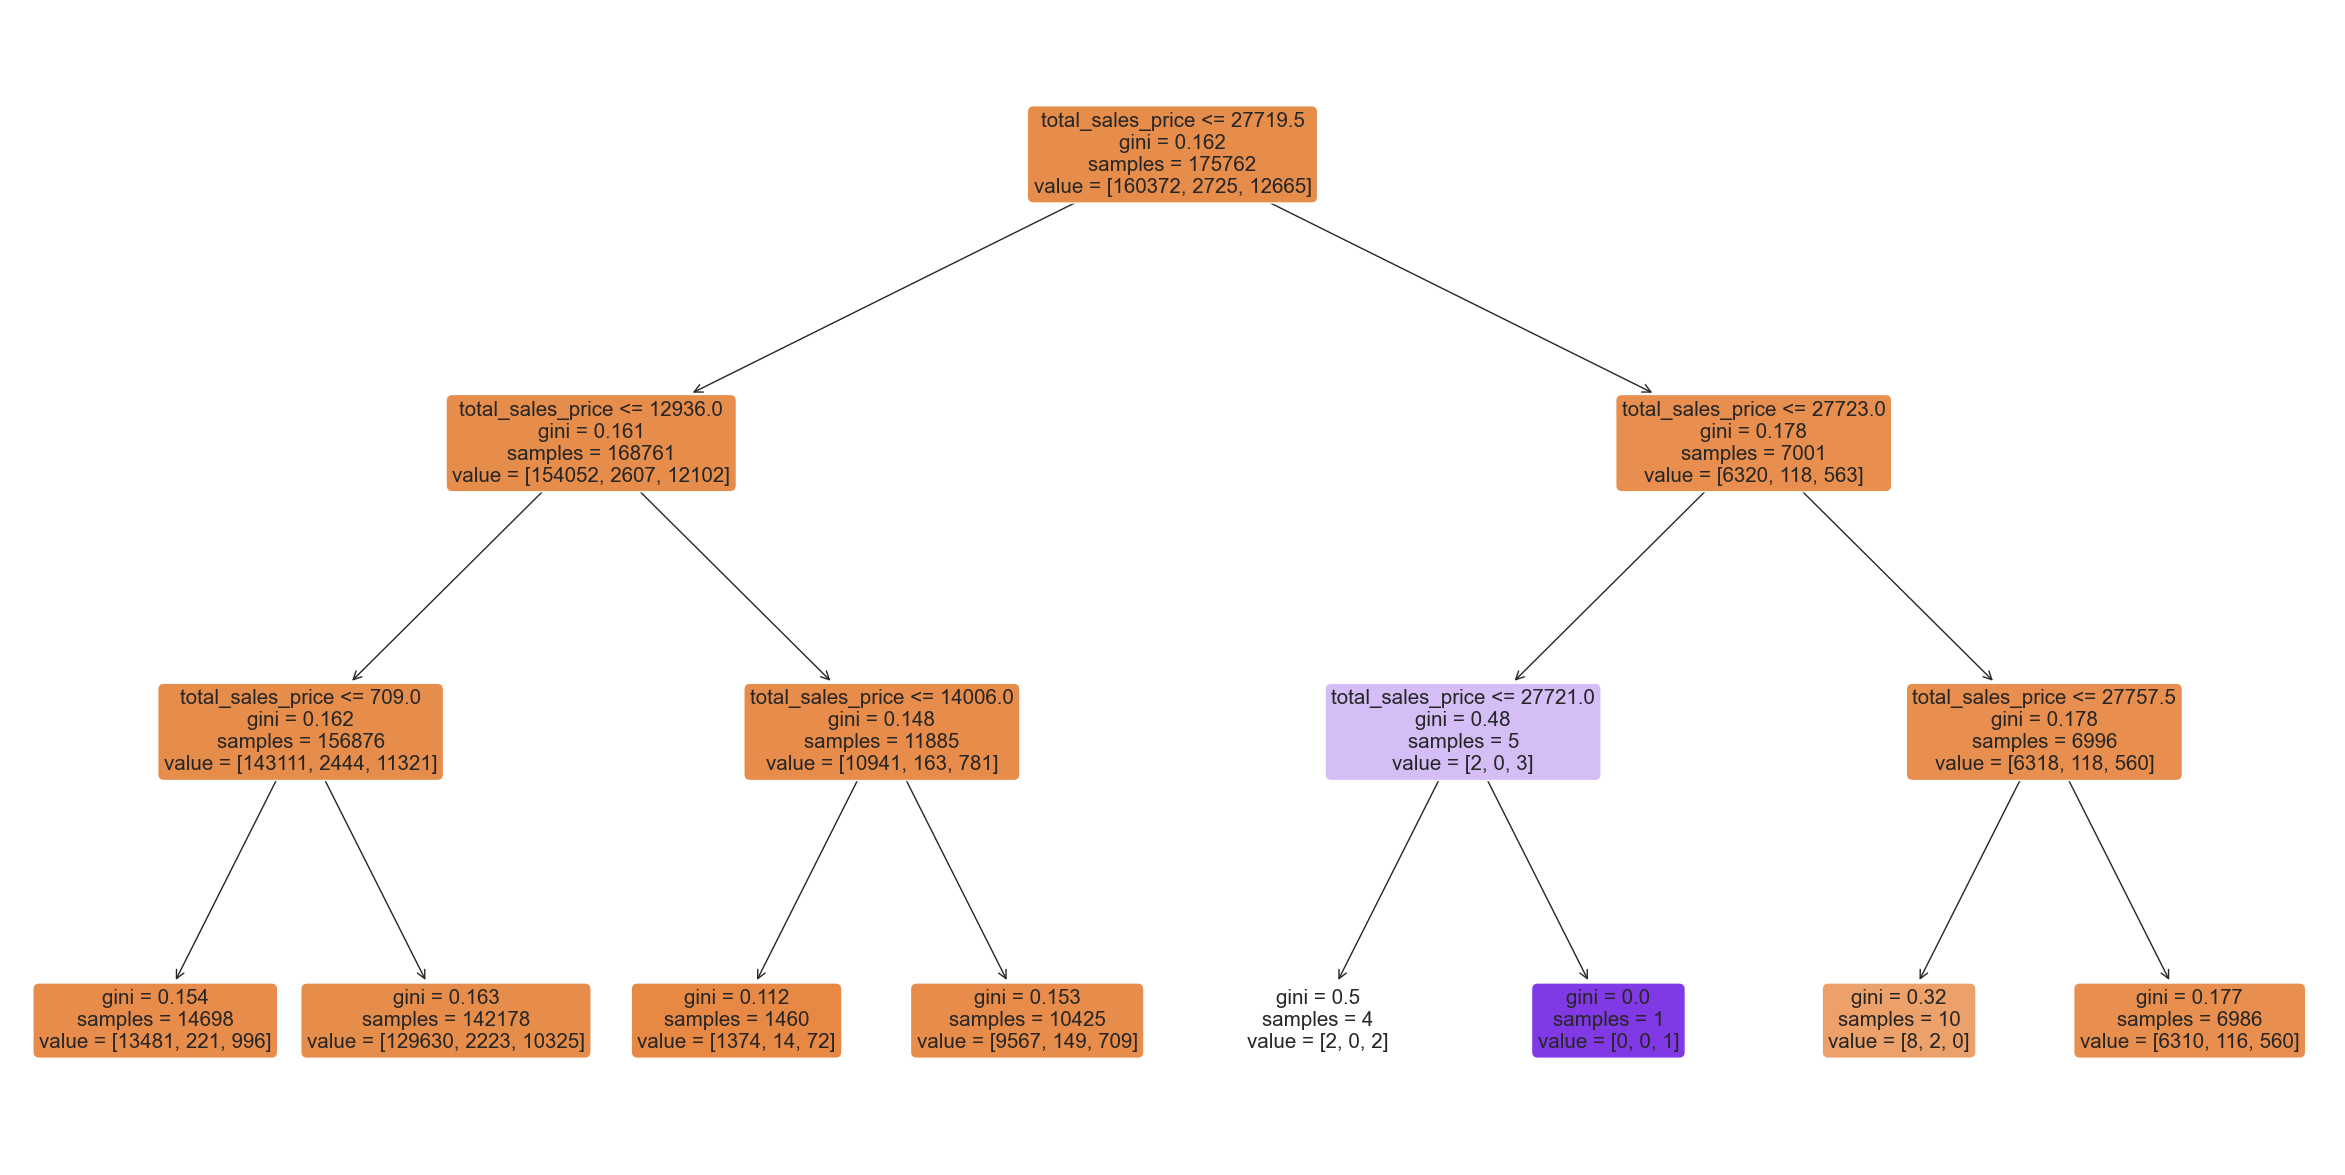

In [31]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,15))
plot_tree(tree, filled=True, rounded=True, 
          feature_names=salePrice.columns)